In [0]:
!ls


In [0]:
#USE PYTHON 2 AND GPU ACCELERATOR
%cd /content

!rm -r /content/deeplabmodel
!rm -r /content/deeplabdata
!rm -r /content/deeplabowndata

#CLONE deeplab
!git clone https://github.com/Johannes0Horn/deeplabmodel.git
  
#CLONE example dataset from segnet
#!git clone https://github.com/Johannes0Horn/deeplabdata.git
  
#CLONE own dataset
!git clone https://github.com/Johannes0Horn/deeplabowndata.git

  

/content
rm: cannot remove '/content/deeplabmodel': No such file or directory
rm: cannot remove '/content/deeplabdata': No such file or directory
rm: cannot remove '/content/deeplabowndata': No such file or directory
Cloning into 'deeplabmodel'...
remote: Enumerating objects: 2950, done.
remote: Counting objects: 100% (2950/2950), done.
remote: Compressing objects: 100% (2357/2357), done.
remote: Total 2950 (delta 541), reused 2929 (delta 520), pack-reused 0
Receiving objects: 100% (2950/2950), 280.41 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (541/541), done.
Checking out files: 100% (2729/2729), done.
Cloning into 'deeplabowndata'...
remote: Enumerating objects: 5217, done.
remote: Counting objects: 100% (5217/5217), done.
remote: Compressing objects: 100% (5214/5214), done.
remote: Total 5217 (delta 2), reused 5217 (delta 2), pack-reused 0
Receiving objects: 100% (5217/5217), 222.23 MiB | 31.74 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (5210/5210

In [0]:
#goto model
%cd deeplabmodel/research


/content/deeplabmodel/research


In [0]:
#set env varables
import os
os.environ['PYTHONPATH'] += ":/content/deeplabmodel/research/"
os.environ['PYTHONPATH'] += ":/content/deeplabmodel/research/slim/"

In [0]:
!echo $PYTHONPATH

/env/python:/content/deeplabmodel/research/:/content/deeplabmodel/research/slim/


In [0]:
#test deeplab
#!python deeplab/model_test.py

In [0]:
#BUILD TF RECORD FILES
%cd deeplab/datasets

/content/deeplabmodel/research/deeplab/datasets


In [0]:

#create tfrecord folder
!rm -r /content/deeplabowndata/tfrecord
!mkdir /content/deeplabowndata/tfrecord

# from /research/deeplab/datasets
!python ./build_voc2012_data.py \
  --image_folder="/content/deeplabowndata/allpngdownsampled"\
  --semantic_segmentation_folder="/content/deeplabowndata/allpngdownsampledmasks"\
  --list_folder="/content/deeplabowndata/index"\
  --image_format="png"\
  --output_dir="/content/deeplabowndata/tfrecord"

In [0]:
%cd /content/deeplabmodel/research
!rm -r /content/trainlog
!mkdir /content/trainlog

/content/deeplabmodel/research
rm: cannot remove '/content/trainlog': No such file or directory


In [0]:
!python deeplab/train.py \
    --logtostderr \
    --training_number_of_steps=3000 \
    --train_split="train" \
    --model_variant="mobilenet_v2" \
    --output_stride=16 \
    --decoder_output_stride=4 \
    --train_crop_size=321 \
    --train_crop_size=321 \
    --train_batch_size=8 \
    --base_learning_rate=0.0001 \
    --dataset="treeo" \
    --tf_initial_checkpoint='/content/model.ckpt' \
    --train_logdir='/content/trainlog' \
    --dataset_dir='/content/deeplabowndata/tfrecord' \
    --initialize_last_layer = False \
    --last_layers_contain_logits_only = True

In [0]:
#VISUALIZATION
!rm -r /content/vislog
!mkdir /content/vislog
# From tensorflow/models/research/
!python deeplab/vis.py \
    --logtostderr \
    --vis_split="val" \
    --model_variant="mobilenet_v2" \
    --output_stride=16 \
    --decoder_output_stride=4 \
    --vis_crop_size=360 \
    --vis_crop_size=480 \
    --dataset="treeo" \
    --colormap_type="pascal" \
    --checkpoint_dir='/content/trainlog' \
    --vis_logdir='/content/vislog' \
    --dataset_dir='/content/deeplabowndata/tfrecord'

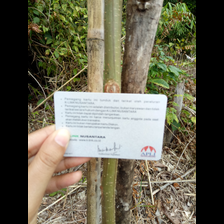

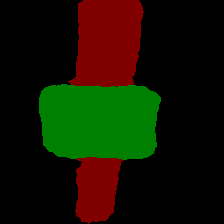

In [0]:
from IPython.display import Image, display
display(Image('/content/vislog/segmentation_results/000002_image.png'))
display(Image('/content/vislog/segmentation_results/000002_prediction.png'))


In [0]:
#EVAL
%cd /content/deeplabmodel/research
!rm -r /content/evallog
!mkdir /content/evallog

!python deeplab/eval.py \
    --logtostderr \
    --eval_split="val" \
    --model_variant="mobilenet_v2" \
    --output_stride=16 \
    --decoder_output_stride=4 \
    --eval_crop_size=360 \
    --eval_crop_size=480 \
    --dataset="treeo" \
    --checkpoint_dir='/content/trainlog' \
    --eval_logdir='/content/evallog' \
    --dataset_dir='/content/deeplabowndata/tfrecord'

In [0]:
#zip trainlog, so its downloadable
!zip -r /content/trainlog.zip /content/trainlog

In [0]:
%cd /content
!unzip '/content/trainlog.zip'


/content
Archive:  /content/trainlog.zip
   creating: trainlog/
  inflating: trainlog/checkpoint     
  inflating: trainlog/events.out.tfevents.1550411710.edbce593a289  
  inflating: trainlog/graph.pbtxt    
  inflating: trainlog/model.ckpt-10000.data-00000-of-00001  
  inflating: trainlog/model.ckpt-10000.index  
  inflating: trainlog/model.ckpt-10000.meta  
  inflating: trainlog/model.ckpt-2444.data-00000-of-00001  
  inflating: trainlog/model.ckpt-2444.index  
  inflating: trainlog/model.ckpt-2444.meta  
  inflating: trainlog/model.ckpt-4910.data-00000-of-00001  
  inflating: trainlog/model.ckpt-4910.index  
  inflating: trainlog/model.ckpt-4910.meta  
  inflating: trainlog/model.ckpt-7374.data-00000-of-00001  
  inflating: trainlog/model.ckpt-7374.index  
  inflating: trainlog/model.ckpt-7374.meta  
  inflating: trainlog/model.ckpt-9821.data-00000-of-00001  
  inflating: trainlog/model.ckpt-9821.index  
  inflating: trainlog/model.ckpt-9821.meta  


In [0]:
#FREEZE
# From tensorflow/models/research/
%cd /content/deeplabmodel/research
!mkdir /content/frozen
# Assume all checkpoint files share the same path prefix `${CHECKPOINT_PATH}`.
!python deeplab/export_model.py \
    --checkpoint_path=/content/trainlog/model.ckpt-10000 \
    --export_path=/content/frozen/frozen_inference_graph.pb \
    --logtostderr \
    --eval_split="val" \
    --model_variant="mobilenet_v2" \
    --output_stride=16 \
    --decoder_output_stride=4 \
    --eval_crop_size=360 \
    --eval_crop_size=480 \
    --dataset="treeo" \


/content/deeplabmodel/research
mkdir: cannot create directory ‘/content/frozen’: File exists
INFO:tensorflow:Prepare to export model to: /content/frozen/frozen_inference_graph.pb
INFO:tensorflow:Exported model performs single-scale inference.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
2019-02-19 17:45:57.359990: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-02-19 17:45:57.360244: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55949a76b180 executing computations on platform Host. Devices:
2019-02-19 17:45:57.360281: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-02-19 17:45:57.422213: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1)

In [0]:
#CHANGE TO PYTHON 3
!pip install tensorflowjs

In [0]:
#convert to tensorflowjs working option to tfjs_graph_model
!mkdir '/content/webmodel' 
!tensorflowjs_converter --input_format=tf_frozen_model --output_node_names='SemanticPredictions' --saved_model_tags=serve '/content/frozen/frozen_inference_graph.pb' '/content/webmodel'

In [0]:
!zip -r /content/webmodel.zip /content/webmodel

  adding: content/webmodel/ (stored 0%)
  adding: content/webmodel/tensorflowjs_model.pb (deflated 91%)
  adding: content/webmodel/group1-shard2of3 (deflated 7%)
  adding: content/webmodel/group1-shard3of3 (deflated 7%)
  adding: content/webmodel/weights_manifest.json (deflated 93%)
  adding: content/webmodel/group1-shard1of3 (deflated 7%)
